In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score, confusion_matrix,  classification_report

#● Loading your MNIST dataset for the data loader


In [ ]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

batch_size = 64
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

#● Visualize several MNIST datasets

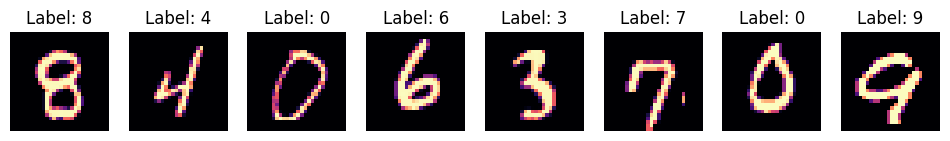

In [ ]:
import matplotlib.pyplot as plt

# Assuming axs is a list of subplots
fig, axs = plt.subplots(1, 8, figsize=(12, 5))

# Get a batch of training data
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Show the images with their labels
for i in range(8):
    axs[i].imshow(images[i].numpy().squeeze(), cmap='magma')  # Assuming cmap='gray' for grayscale images
    axs[i].set_title(f"Label: {labels[i].item()}")
    axs[i].axis('off')

plt.show()

# ● Design your Neural Network model




In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

net = Net()

# ● Setup your hyperparameter such as Loss Function, Optimizer,Learning Rate, etc

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001)

# ● Develop a training loop and run a training model

In [ ]:
epochs = 20
for epoch in range (epochs):
  running_loss = 0.0
  for i, data in enumerate (train_loader, 0):
    inputs, labels = data
    optimizer.zero_grad()
    outputs = net(inputs)
    loss = criterion (outputs, labels)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
  print (f'Epoch {epoch + 1}, Loss: {running_loss / len(train_loader)}')

Epoch 1, Loss: 1.9561892172166788
Epoch 2, Loss: 1.2572896282301782
Epoch 3, Loss: 0.8537660051129266
Epoch 4, Loss: 0.6701004388871223
Epoch 5, Loss: 0.5735679497914528
Epoch 6, Loss: 0.515235813854854
Epoch 7, Loss: 0.4759713702364517
Epoch 8, Loss: 0.4481012332541094
Epoch 9, Loss: 0.42677867495174854
Epoch 10, Loss: 0.41042298358132334
Epoch 11, Loss: 0.3968493345417956
Epoch 12, Loss: 0.3858721314399227
Epoch 13, Loss: 0.3764636609345865
Epoch 14, Loss: 0.3685142537678229
Epoch 15, Loss: 0.36135286923601173
Epoch 16, Loss: 0.3549843134402212
Epoch 17, Loss: 0.34938279320118526
Epoch 18, Loss: 0.3445456071591962
Epoch 19, Loss: 0.3398242680423422
Epoch 20, Loss: 0.33565784263204157


# ● Develop a training loop and run a training model

In [ ]:
correct = 0
total = 0
all_labels = []
all_preds = []

with torch.no_grad():
  for data in test_loader:
    images, labels = data
    outputs = net (images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
    all_labels.extend(labels.numpy())
    all_preds.extend(predicted.numpy())

accuracy = correct/total
confusion = confusion_matrix(all_labels, all_preds)
classification_report_str = classification_report(all_labels, all_preds)

print (f'Accuracy: {accuracy * 100}%')
print('Confusion Matrix:')
print(confusion)
print('Classification Report:')
print(classification_report_str)

Accuracy: 90.9%
Confusion Matrix:
[[ 960    0    2    2    0    7    5    1    3    0]
 [   0 1099    2    2    0    2    4    1   25    0]
 [  11    9  899   16   17    3   17   16   37    7]
 [   4    1   21  905    0   32    1   16   22    8]
 [   1    5    5    2  901    1   12    2   11   42]
 [  12    2    4   44    8  762   17    8   28    7]
 [  12    3    7    0   15   18  896    2    5    0]
 [   3   13   28    5    9    0    0  934    3   33]
 [   9    6    7   29   10   28   16    9  849   11]
 [  14    6    4   11   46    8    1   25    9  885]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.96      0.97      0.96      1135
           2       0.92      0.87      0.89      1032
           3       0.89      0.90      0.89      1010
           4       0.90      0.92      0.91       982
           5       0.89      0.85      0.87       892
           6       0.92      0.94

# ● Describe and explain your Result





Akurasi model yang didapatkan sebesar 90,9% sehingga dapat disimpulkan bahwa metode deep learning dapat digunakan untuk memperkirakan pendeteksian tulisan tangan dengan akurasi >90%